In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
data = pd.read_csv("IMDB Dataset.csv")

def clean_text(text):
    import re
    text = re.sub(r'<br />', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text.lower()

data['review'] = data['review'].apply(clean_text)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [4]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
padded = pad_sequences(sequences, maxlen=200)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(padded, data['sentiment'], test_size=0.2, random_state=42)

In [6]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=200),
    GlobalAveragePooling1D(),
    Dropout(0.3),  # Reduce overfitting by randomly dropping 30% of connections
    Dense(16, activation='relu'),
    Dropout(0.3),  # Another dropout layer
    Dense(1, activation='sigmoid')  # Binary classification
])

/home/stephen/miniconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1745333044.563749    2859 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/15


I0000 00:00:1745333085.353310    2981 service.cc:152] XLA service 0x7fb5b80154e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745333085.353359    2981 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-04-22 20:14:45.372384: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745333085.499882    2981 cuda_dnn.cc:529] Loaded cuDNN version 90300


  41/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5041 - loss: 0.6935

I0000 00:00:1745333086.214971    2981 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6333 - loss: 0.6565 - val_accuracy: 0.8516 - val_loss: 0.4022
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8454 - loss: 0.3821 - val_accuracy: 0.8778 - val_loss: 0.2964
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8850 - loss: 0.2930 - val_accuracy: 0.8874 - val_loss: 0.2724
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8972 - loss: 0.2651 - val_accuracy: 0.8926 - val_loss: 0.2645
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9085 - loss: 0.2396 - val_accuracy: 0.8892 - val_loss: 0.2640
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9173 - loss: 0.2242 - val_accuracy: 0.8855 - val_loss: 0.2757
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9201 - loss: 0.2109 - val_accuracy: 0.8926 - val_loss: 0.2638
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9298 - loss: 0.1987 - val_accurac

In [10]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8852
Precision: 0.8755
Recall: 0.9002
F1 Score: 0.8877


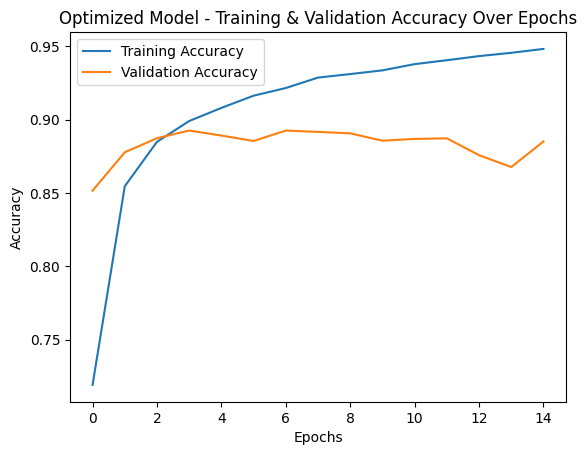

In [11]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Optimized Model - Training & Validation Accuracy Over Epochs")
plt.legend()
plt.show()

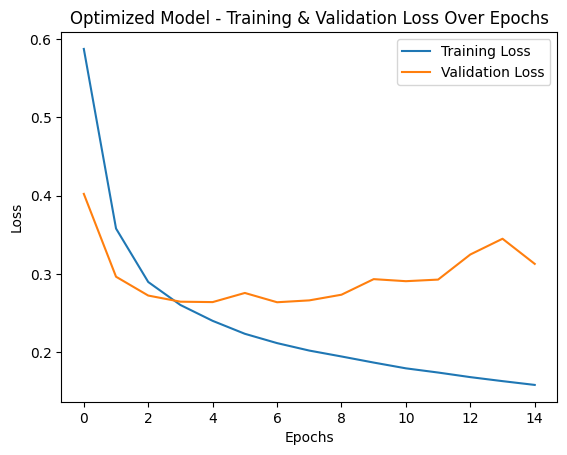

In [12]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimized Model - Training & Validation Loss Over Epochs")
plt.legend()
plt.show()